# Assignment 02: Wifi Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
wifi_data = pd.read_excel('data\Wifi_Data.xlsx', usecols=lambda x: x!= 'Unnamed: 0')
wifi_data.sample(5)

,OBJECTID,Borough,Type,Provider,Latitude,Longitude,Location_T,City,BoroCode,NTACode
2006,2007,MN,Free,LinkNYC - Citybridge,40.747377,-73.997127,Outdoor Kiosk,New York,1,MN13
2499,2500,BK,Free,LinkNYC - Citybridge,40.713913,-73.944206,Outdoor Kiosk,Brooklyn,3,BK90
1896,1897,QU,Free,LinkNYC - Citybridge,40.720017,-73.844787,Outdoor Kiosk,Queens,4,QN17
734,735,BK,Limited Free,ALTICEUSA,40.576960,-73.943590,Outdoor,Brooklyn,3,BK17
678,679,BX,Free,LinkNYC - Citybridge,40.861174,-73.896444,Outdoor Kiosk,Bronx,2,BX05


In [3]:
wifi_data.shape

(2566, 10)

In [4]:
wifi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566 entries, 0 to 2565
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    2566 non-null   int64  
 1   Borough     2566 non-null   object 
 2   Type        2566 non-null   object 
 3   Provider    2566 non-null   object 
 4   Latitude    2566 non-null   float64
 5   Longitude   2566 non-null   float64
 6   Location_T  2566 non-null   object 
 7   City        2566 non-null   object 
 8   BoroCode    2566 non-null   int64  
 9   NTACode     2566 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 200.6+ KB


Using Python’s Pandas and Seaborn library to answer following business questions: Get the data provided, check frequency distribution of the features, drop irrelevant and redundant features if any and state your inferences?

In [5]:
# Data Cleaning and Feature Selection(Drop Irrelevant and redundant features)
wifi_data = wifi_data.drop(['OBJECTID', 'Latitude', 'Longitude', 'BoroCode', 'NTACode'], axis=1)

In [6]:
# Check for missing values
wifi_data.isna().sum().sum()

0

In [7]:
# Frequency Distribution of Features
columns = list(wifi_data.columns)
features = [x for x in columns if wifi_data[x].dtype=='object']
for feature in features:
    print('\n', wifi_data[feature].value_counts())


 Borough
MN    1204
BK     595
QU     415
BX     257
SI      95
Name: count, dtype: int64

 Type
Free            1983
Limited Free     581
Partner Site       2
Name: count, dtype: int64

 Provider
LinkNYC - Citybridge       1134
SPECTRUM                    343
Transit Wireless            276
ALTICEUSA                   237
Harlem                      128
Downtown Brooklyn           100
NYPL                         90
QPL                          65
BPL                          59
Manhattan Down Alliance      36
Chelsea                      30
NYCHA                        28
AT&T                         27
City Tech                    11
Partner                       2
Name: count, dtype: int64

 Location_T
Outdoor Kiosk         1134
Outdoor                696
Subway Station         276
Library                214
Indoor                 125
Outdoor TWC Aerial     121
Name: count, dtype: int64

 City
New York            1204
Brooklyn             595
Queens               350
Bronx        

1. Plot the providers vs number of all wi-fi hotspots they have in operation? Who has the highest installations?

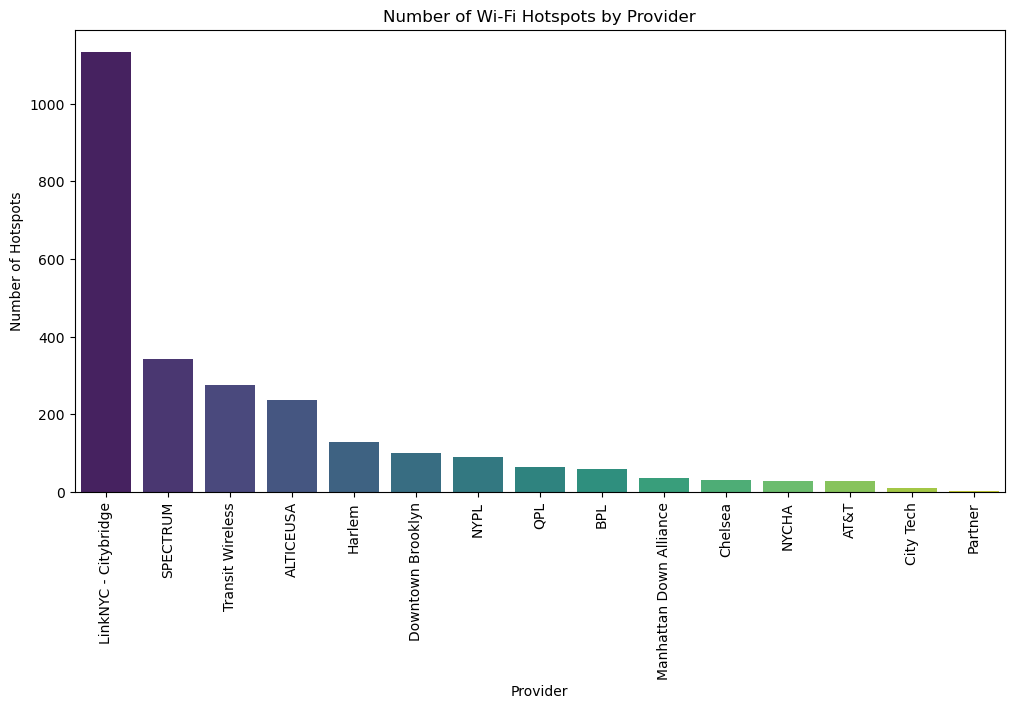

In [8]:
plt.figure(figsize=(12, 6))
provider_counts = wifi_data['Provider'].value_counts()
sns.barplot(x=provider_counts.index, y=provider_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Provider')
plt.ylabel('Number of Hotspots')
plt.title('Number of Wi-Fi Hotspots by Provider')
plt.show()

Highest Installation - LinkNYC-Citybridge



2. Plot providers vs number of free wifi hotspots.

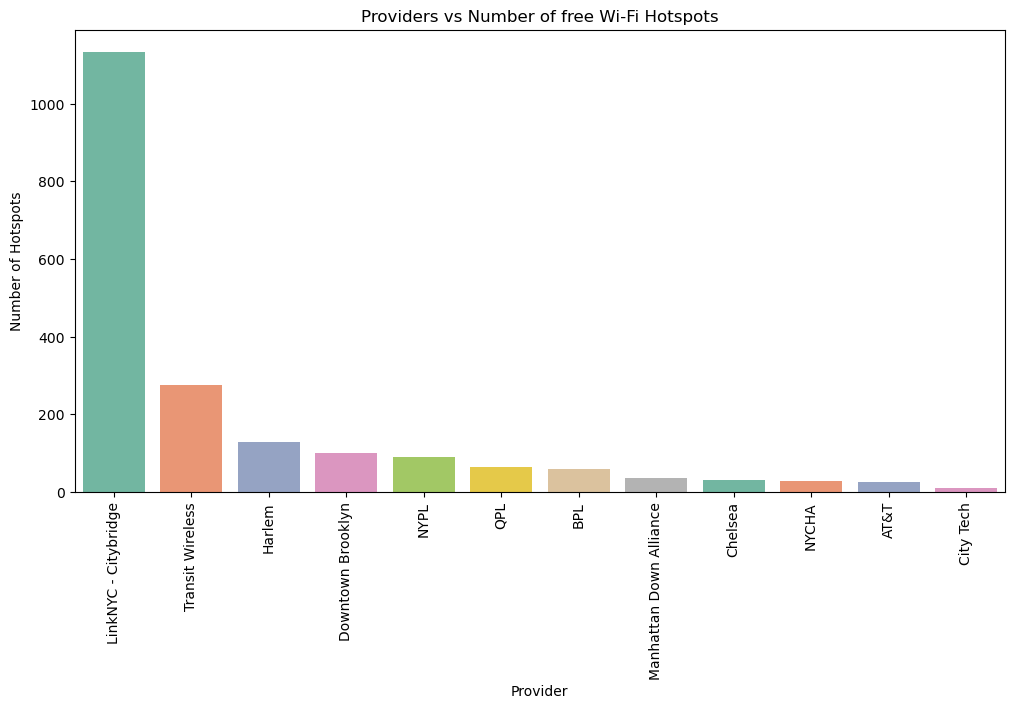

In [9]:
plt.figure(figsize=(12, 6))
free_wifi_df = wifi_data[wifi_data['Type'] == 'Free']
sns.countplot(data=free_wifi_df, x='Provider', order=free_wifi_df['Provider'].value_counts().index, palette='Set2')
plt.xticks(rotation=90)
plt.xlabel('Provider')
plt.ylabel('Number of Hotspots')
plt.title('Providers vs Number of free Wi-Fi Hotspots')
plt.show()

3. Are there any provider(s) who do not provide free wifi?

In [10]:
# Providers who do not provide free wifi
providers_without_free_wifi = wifi_data[wifi_data['Type'] != 'Free']['Provider'].unique()
print(f"Providers who do not provide free Wi-Fi: {', '.join(providers_without_free_wifi)}")

Providers who do not provide free Wi-Fi: ALTICEUSA, SPECTRUM, AT&T, Partner


4. Which Location type (Location_T) are most common and least common?

In [11]:
most_common_location_type = wifi_data['Location_T'].value_counts().idxmax()
least_common_location_type = wifi_data['Location_T'].value_counts().idxmin()
print(f"Most common location type: {most_common_location_type}")
print(f"Least common location type: {least_common_location_type}")

Most common location type: Outdoor Kiosk
Least common location type: Outdoor TWC Aerial


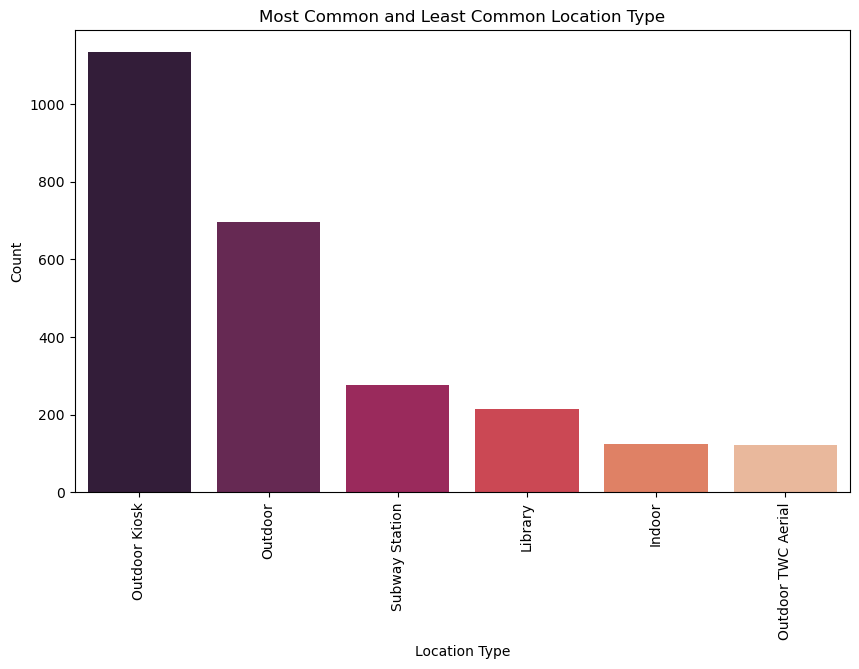

In [12]:
plt.figure(figsize=(10, 6))
location_type_counts = wifi_data['Location_T'].value_counts()
sns.barplot(x=location_type_counts.index, y=location_type_counts.values, palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.title('Most Common and Least Common Location Type')
plt.show()

5. How many free “indoor” and “outdoor” hotspots are there? Which companies have the highest number of Outdoor Free installations.

In [13]:
# Count free "indoor" and "outdoor" hotspots
free_wifi_df = wifi_data[wifi_data['Type'] == 'Free']
free_wifi_df['Location_T'].value_counts()

Location_T
Outdoor Kiosk     1134
Outdoor            359
Subway Station     276
Library            214
Name: count, dtype: int64

Number of free 'indoor' hotspots: 0                      
Number of free 'outdoor' hotspots: 359

In [14]:
# Companies with the highest number of Outdoor Free installations
outdoor_free_providers = free_wifi_df[free_wifi_df['Location_T']=='Outdoor']['Provider'].value_counts()
print("Companies with the highest number of Outdoor Free installations:\n")
print(outdoor_free_providers)

Companies with the highest number of Outdoor Free installations:

Provider
Harlem                     128
Downtown Brooklyn          100
Manhattan Down Alliance     36
Chelsea                     30
NYCHA                       28
AT&T                        26
City Tech                   11
Name: count, dtype: int64
